In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv('D:\DS\DS projects\Musical_instruments_reviews.csv')

In [3]:
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [4]:
data.shape

(10261, 9)

In [5]:
data.info

<bound method DataFrame.info of            reviewerID        asin  \
0      A2IBPI20UZIR0U  1384719342   
1      A14VAT5EAX3D9S  1384719342   
2      A195EZSQDW3E21  1384719342   
3      A2C00NNG1ZQQG2  1384719342   
4       A94QU4C90B1AX  1384719342   
...               ...         ...   
10256  A14B2YH83ZXMPP  B00JBIVXGC   
10257   A1RPTVW5VEOSI  B00JBIVXGC   
10258   AWCJ12KBO5VII  B00JBIVXGC   
10259  A2Z7S8B5U4PAKJ  B00JBIVXGC   
10260  A2WA8TDCTGUADI  B00JBIVXGC   

                                           reviewerName   helpful  \
0      cassandra tu "Yeah, well, that's just like, u...    [0, 0]   
1                                                  Jake  [13, 14]   
2                         Rick Bennette "Rick Bennette"    [1, 1]   
3                             RustyBill "Sunday Rocker"    [0, 0]   
4                                         SEAN MASLANKA    [0, 0]   
...                                                 ...       ...   
10256                                   

In [6]:
data1=data.copy()

In [7]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [8]:
data1['reviewText'].fillna('Missing', inplace=True)

In [9]:
data1.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [10]:
data1['reviews']=data1['reviewText']+data1['summary']
data1=data1.drop(['reviewText', 'summary'], axis=1)
data1.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [11]:
data.shape

(10261, 9)

In [12]:
data1['overall'].value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [13]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [14]:
data1['sentiment'] = data1.apply(f, axis=1)
data1.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...,Positive


In [15]:
data1['sentiment'].value_counts()

Positive    9022
Neutral      772
Negative     467
Name: sentiment, dtype: int64

In [16]:
data1=data1.drop(['reviewerName','unixReviewTime','reviewTime','helpful','asin'], axis=1)

In [17]:
data1

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,"Not much to write about here, but it does exac...",Positive
1,A14VAT5EAX3D9S,5.0,The product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,5.0,The primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,5.0,Nice windscreen protects my MXL mic and preven...,Positive
4,A94QU4C90B1AX,5.0,This pop filter is great. It looks and perform...,Positive
...,...,...,...,...
10256,A14B2YH83ZXMPP,5.0,"Great, just as expected. Thank to all.Five Stars",Positive
10257,A1RPTVW5VEOSI,5.0,I've been thinking about trying the Nanoweb st...,Positive
10258,AWCJ12KBO5VII,4.0,I have tried coated strings in the past ( incl...,Positive
10259,A2Z7S8B5U4PAKJ,4.0,"Well, MADE by Elixir and DEVELOPED with Taylor...",Positive


In [18]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [19]:
data1['reviews']=data1['reviews'].apply(lambda x:review_cleaning(x))
data1.head()

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,not much to write about here but it does exact...,Positive
1,A14VAT5EAX3D9S,5.0,the product does exactly as it should and is q...,Positive
2,A195EZSQDW3E21,5.0,the primary job of this device is to block the...,Positive
3,A2C00NNG1ZQQG2,5.0,nice windscreen protects my mxl mic and preven...,Positive
4,A94QU4C90B1AX,5.0,this pop filter is great it looks and performs...,Positive


In [20]:
stop_words= ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [21]:
data1['reviews'] = data1['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data1.head()

,reviewerID,overall,reviews,sentiment
0,A2IBPI20UZIR0U,5.0,not much write but exactly supposed filters po...,Positive
1,A14VAT5EAX3D9S,5.0,product exactly quite affordablei not realized...,Positive
2,A195EZSQDW3E21,5.0,primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,5.0,nice windscreen protects mxl mic prevents pops...,Positive
4,A94QU4C90B1AX,5.0,pop filter great looks performs like studio fi...,Positive


In [22]:
x=data1['sentiment'].value_counts()
x

Positive    9022
Neutral      772
Negative     467
Name: sentiment, dtype: int64

<BarContainer object of 3 artists>

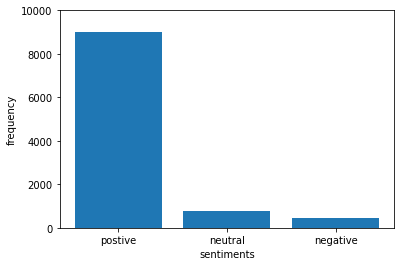

In [23]:
x
datatypes=['postive','neutral','negative']
plt.xlabel('sentiments')
plt.ylabel('frequency')
plt.ylim(0,10000)
plt.bar(datatypes,x)

## Stemming-Converting words into root form

In [24]:
review_features=data1.copy()
review_features=review_features[['reviews']].reset_index(drop=True)
review_features.head()

,reviews
0,not much write but exactly supposed filters po...
1,product exactly quite affordablei not realized...
2,primary job device block breath would otherwis...
3,nice windscreen protects mxl mic prevents pops...
4,pop filter great looks performs like studio fi...


In [25]:
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews'][i])
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review = ' '.join(review)
    corpus.append(review)    

## TFIDF(Term Frequency — Inverse Document Frequency)

In [26]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews'])

In [27]:
X.shape

(10261, 311709)

## Label Encoding

In [28]:
label_encoder =LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
data1['sentiment']= label_encoder.fit_transform(data1['sentiment']) 
  
data1['sentiment'].unique() 

array([2, 1, 0])

In [29]:
data1['sentiment'].value_counts()

2    9022
1     772
0     467
Name: sentiment, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,data1['sentiment'], test_size=0.25, random_state=0)

In [31]:
logreg= LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [32]:
print(logreg.score(X_train,y_train))
print(logreg.score(X_test,y_test))

0.8757634827810267
0.8897116134060795


In [33]:
cm = confusion_matrix(data1['sentiment'],logreg.predict(X))
cm

array([[   0,    0,  467],
       [   0,    0,  772],
       [   0,    0, 9022]], dtype=int64)

In [34]:
pred=['I hate it so much']

In [49]:
logreg.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2])

In [47]:
y_test

2709    2
7606    2
8981    2
5062    2
3459    2
       ..
9422    2
5306    1
4595    2
9427    2
2364    2
Name: sentiment, Length: 2566, dtype: int32